# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [1]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import module.etl as etl
pd.options.display.max_columns = 999

In [9]:
plant = pd.read_csv("data/31.finaldata_plant/plant_weather_sea.csv")
plant
plant["MEA_DDHR"] = pd.to_datetime(plant['MEA_DDHR'])

In [10]:
plant.dtypes

MEA_DDHR         datetime64[ns]
PLANT                     int64
LOC                       int64
TEM_IN                  float64
HUM_IN                  float64
TEM_COIL                float64
TEM_OUT_LOC1            float64
HUM_OUT_LOC1            float64
X24H_TMA                 object
X24H_COND_LOC           float64
X48H_TMA                 object
X48H_COND_LOC           float64
DEW_POINT_IN            float64
MONTH                     int64
WEEK                      int64
HOUR                      int64
AVG_PA                  float64
AVG_PS                  float64
HR1_RN                  float64
AVG_TA                  float64
AVG_WS                  float64
MAX_WS                  float64
MAX_WS_WD               float64
MAX_INS_WS              float64
MAX_INS_WS_WD           float64
WD_N1                   float64
WS_N1                   float64
GUST_WS_N1              float64
PA                      float64
BUOY_HM                 float64
BUOY_TA                 float64
MAX_WH  

In [15]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,MONTH,WEEK,HOUR,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-4.561169,4,13,0,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-6.805218,4,13,0,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-3.309370,4,13,0,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.222123,4,13,3,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-4.183719,4,13,3,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-4.368462,3,13,23,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-4.666200,3,13,23,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-2.967238,3,13,23,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-3.641345,3,13,23,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0


In [11]:
cw = pd.read_csv("data/22.savedata_weather/CWBUOY_merge.csv")
cw
cw["MEA_DDHR"] = pd.to_datetime(cw['MEA_DDHR'])

In [12]:
cw.dtypes

MEA_DDHR           datetime64[ns]
CWBUOY_WRTM               float64
CWBUOY_WH                 float64
CWBUOY_ATENT_WH           float64
CWBUOY_AVG_WH             float64
CWBUOY_WVPRD              float64
dtype: object

In [17]:
cw

,MEA_DDHR,CWBUOY_WRTM,CWBUOY_WH,CWBUOY_ATENT_WH,CWBUOY_AVG_WH,CWBUOY_WVPRD
0,2016-04-01 00:00:00,6.3,0.1,0.1,0.1,6.6
1,2016-04-01 01:00:00,6.4,0.2,0.1,0.1,7.1
2,2016-04-01 02:00:00,6.5,0.2,0.1,0.1,6.6
3,2016-04-01 03:00:00,6.4,0.1,0.1,0.1,4.3
4,2016-04-01 04:00:00,6.4,0.2,0.1,0.1,4.2
...,...,...,...,...,...,...
34301,2020-03-31 20:00:00,7.7,0.5,0.4,0.2,5.7
34302,2020-03-31 21:00:00,7.7,0.4,0.3,0.2,4.1
34303,2020-03-31 22:00:00,7.7,0.3,0.2,0.1,3.0
34304,2020-03-31 23:00:00,7.7,0.3,0.2,0.1,6.9


In [13]:
plant_total = plant.merge(cw, how='left', left_on='MEA_DDHR', right_on='MEA_DDHR')

In [18]:
plant_total.tail(30)

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,MONTH,WEEK,HOUR,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,CWBUOY_WRTM,CWBUOY_WH,CWBUOY_ATENT_WH,CWBUOY_AVG_WH,CWBUOY_WVPRD
349287,2019-03-31 23:00:00,2,1,9.18,35.96,9.22,4.72,50.98,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-5.124671,3,13,23,1021.1,1023.6,0.0,3.5,2.725,3.375,287.7,5.775,298.125,333.000000,8.0,10.000000,1023.7,57.0,5.6,2.0,0.0,300.000000,8.000000,313.0,14.0,5.0,1023.2,48.000000,6.3,1.2,0.7,0.5,4.1
349288,2019-03-31 23:00:00,2,2,9.11,37.12,9.72,4.72,50.98,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-4.767948,3,13,23,1021.1,1023.6,0.0,3.5,2.725,3.375,287.7,5.775,298.125,333.000000,8.0,10.000000,1023.7,57.0,5.6,2.0,0.0,300.000000,8.000000,313.0,14.0,5.0,1023.2,48.000000,6.3,1.2,0.7,0.5,4.1
349289,2019-03-31 23:00:00,2,3,8.29,37.82,9.53,4.72,50.98,2019-04-01 23:00:00,0.0,2019-04-02 23:00:00,0.0,-5.252838,3,13,23,1021.1,1023.6,0.0,3.5,2.725,3.375,287.7,5.775,298.125,333.000000,8.0,10.000000,1023.7,57.0,5.6,2.0,0.0,300.000000,8.000000,313.0,14.0,5.0,1023.2,48.000000,6.3,1.2,0.7,0.5,4.1
349290,2019-03-31 23:10:00,1,1,10.52,36.39,10.52,6.40,43.86,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-3.777499,3,13,23,1021.1,1023.6,0.0,3.5,2.725,3.375,287.7,5.775,298.125,333.153846,8.0,10.023077,1023.7,57.0,5.6,2.0,0.0,299.923077,8.015385,313.0,14.0,5.0,1023.2,47.846154,NaN,NaN,NaN,NaN,NaN
349291,2019-03-31 23:10:00,1,2,10.55,35.20,11.17,6.40,43.86,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-4.193279,3,13,23,1021.1,1023.6,0.0,3.5,2.725,3.375,287.7,5.775,298.125,333.307692,8.0,10.046154,1023.7,57.0,5.6,2.0,0.0,299.846154,8.030769,313.0,14.0,5.0,1023.2,47.692308,NaN,NaN,NaN,NaN,NaN
349292,2019-03-31 23:10:00,1,3,9.85,37.88,9.79,6.40,43.86,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-3.839249,3,13,23,1021.1,1023.6,0.0,3.5,2.725,3.375,287.7,5.775,298.125,333.461538,8.0,10.069231,1023.7,57.0,5.6,2.0,0.0,299.769231,8.046154,313.0,14.0,5.0,1023.2,47.538462,NaN,NaN,NaN,NaN,NaN
349293,2019-03-31 23:10:00,2,1,9.18,36.32,9.18,4.72,52.11,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-4.993347,3,13,23,1021.1,1023.6,0.0,3.5,2.725,3.375,287.7,5.775,298.125,333.615385,8.0,10.092308,1023.7,57.0,5.6,2.0,0.0,299.692308,8.061538,313.0,14.0,5.0,1023.2,47.384615,NaN,NaN,NaN,NaN,NaN
349294,2019-03-31 23:10:00,2,2,9.08,37.58,9.68,4.72,52.11,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-4.631819,3,13,23,1021.1,1023.6,0.0,3.5,2.725,3.375,287.7,5.775,298.125,333.769231,8.0,10.115385,1023.7,57.0,5.6,2.0,0.0,299.615385,8.076923,313.0,14.0,5.0,1023.2,47.230769,NaN,NaN,NaN,NaN,NaN
349295,2019-03-31 23:10:00,2,3,8.26,38.34,9.57,4.72,52.11,2019-04-01 23:10:00,0.0,2019-04-02 23:10:00,0.0,-5.099800,3,13,23,1021.1,1023.6,0.0,3.5,2.725,3.375,287.7,5.775,298.125,333.923077,8.0,10.138462,1023.7,57.0,5.6,2.0,0.0,299.538462,8.092308,313.0,14.0,5.0,1023.2,47.076923,NaN,NaN,NaN,NaN,NaN
349296,2019-03-31 23:20:00,1,1,10.52,37.09,10.44,6.34,44.02,2019-04-01 23:20:00,0.0,2019-04-02 23:20:00,0.0,-3.523260,3,13,23,1021.1,1023.6,0.0,3.5,2.725,3.375,287.7,5.775,298.125,334.076923,8.0,10.161538,1023.7,57.0,5.6,2.0,0.0,299.461538,8.107692,313.0,14.0,5.0,1023.2,46.923077,NaN,NaN,NaN,NaN,NaN


In [16]:
plant_total.isnull().sum()

MEA_DDHR                0
PLANT                   0
LOC                     0
TEM_IN                  0
HUM_IN                  0
TEM_COIL                0
TEM_OUT_LOC1            0
HUM_OUT_LOC1            0
X24H_TMA                0
X24H_COND_LOC           0
X48H_TMA                0
X48H_COND_LOC           0
DEW_POINT_IN            0
MONTH                   0
WEEK                    0
HOUR                    0
AVG_PA                  0
AVG_PS                  0
HR1_RN                  0
AVG_TA                  0
AVG_WS                  0
MAX_WS                  0
MAX_WS_WD               0
MAX_INS_WS              0
MAX_INS_WS_WD           0
WD_N1                   0
WS_N1                   0
GUST_WS_N1              0
PA                      0
BUOY_HM                 0
BUOY_TA                 0
MAX_WH                  0
AVG_WH                  0
LB_WD                   0
LB_WS                   0
LB_MAX_INS_WD           0
LB_MAX_IWS              0
LB_TA                   0
LB_PS       

## 정규화 할 list 나누기

In [24]:
dummy_list = ["MONTH","WEEK"]
caling_list= ["DEW_POINT_IN", "AVG_PA", "AVG_PS", "HR1_RN", "AVG_TA", "AVG_WS", "MAX_WS", "MAX_WS_WD", "MAX_INS_WS", "MAX_INS_WS_WD", "WD_N1", "WS_N1", "GUST_WS_N1", "PA", "BUOY_HM", "BUOY_TA", "MAX_WH", "AVG_WH", "LB_WD", "LB_WS", "LB_MAX_INS_WD", "LB_MAX_IWS", "LB_TA", "LB_PS", "LB_HM"]

In [25]:
plant = etl.preprosess(plant, caling_list, dummy_list)
plant.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'DEW_POINT_IN', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM']
dummy_category: ['PLANT', 'LOC', 'MONTH', 'WEEK']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52
0,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.948895,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-1.145859,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.839022,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.919136,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.915766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## test_data validation &정규화 preprosessing

In [26]:
test_data = pd.read_csv("data/31.finaldata_plant/test_weather_sea.csv")
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN,MONTH,WEEK,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-4.482439,4,14,1021.200000,1023.7,0.0,3.150000,2.125000,2.550,269.325000,4.250000,283.350000,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0
1,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.247107,4,14,1021.633333,1024.1,0.0,4.958333,2.791667,3.275,288.208333,5.533333,274.216667,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0
2,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.163210,4,14,1022.066667,1024.5,0.0,6.766667,3.458333,4.000,307.091667,6.816667,265.083333,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-3.042714,4,14,1022.500000,1024.9,0.0,8.575000,4.125000,4.725,325.975000,8.100000,255.950000,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-9.291221,4,14,1021.100000,1023.5,0.0,8.837500,4.075000,4.775,304.662500,7.850000,279.862500,272.0,2.0,4.0,1024.0,58.0,6.3,0.0,0.0,227.0,3.1,300.0,9.0,6.1,1023.6,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-4.745901,3,13,1020.500000,1023.0,0.0,1.450000,1.225000,1.400,252.425000,2.175000,263.025000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-4.125121,3,13,1020.700000,1023.2,0.0,0.175000,0.875000,1.225,163.250000,1.525000,184.275000,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-4.064845,3,13,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,29.0,3.3,338.0,8.0,3.9,1023.9,46.0
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-2.224313,3,13,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,149.0,0.9,338.0,8.0,7.2,1023.6,49.0


In [27]:
test = etl.preprosess(test_data,caling_list,dummy_list)
test.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'DEW_POINT_IN', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM']
dummy_category: ['PLANT', 'LOC', 'MONTH', 'WEEK']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52
0,2019-04-01 00:00:00,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,-1.156985,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-04-01 04:30:00,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,-0.722579,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-04-01 10:30:00,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,-1.021676,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-04-01 11:00:00,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,-1.009317,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-04-01 13:30:00,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,-1.650210,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 데이터 분류
## plant_train 데이터
### train, test 데이터 분리

In [28]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)

In [29]:
plant.head()

,X24H_COND_LOC,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52
0,0.0,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.948895,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-1.145859,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.839022,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.919136,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.915766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train24_y = plant[['X24H_COND_LOC']]
train48_y = plant[['X48H_COND_LOC']]

In [31]:
train_y = plant[['X24H_COND_LOC', 'X48H_COND_LOC']]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.3, shuffle=True, random_state=42, stratify=train_y)

In [33]:
y_train24 = y_train[['X24H_COND_LOC']]
y_train48 = y_train[['X48H_COND_LOC']]
y_val24 = y_val[['X24H_COND_LOC']]
y_val48 = y_val[['X48H_COND_LOC']]

### 24시간 후 결로 예상 분류

In [34]:
from sklearn.model_selection import train_test_split
X_train24, X_val24, y_train24, y_val24 = train_test_split(train_X, train24_y, test_size=0.3, shuffle=True, random_state=42, stratify=train24_y)

### 48시간 후 결로 예상 분류

In [35]:
from sklearn.model_selection import train_test_split
X_train48, X_val48, y_train48, y_val48 = train_test_split(train_X, train48_y, test_size=0.3, shuffle=True, random_state=42, stratify=train48_y)

## test_data 만들기

In [36]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
test = test.drop(timeList, axis=1)
test_X = test.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
test24_y = test[['X24H_COND_LOC']]
test48_y = test[['X48H_COND_LOC']]

# Random Forest
## 24 시간 결로 예측

In [179]:
from sklearn.ensemble import RandomForestClassifier
rf_model24 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model24.fit(X_train, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [180]:
y_pred24 = rf_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.93      0.78      0.85       594

    accuracy                           1.00    104796
   macro avg       0.96      0.89      0.92    104796
weighted avg       1.00      1.00      1.00    104796



In [181]:
imp_rf24_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model24.feature_importances_], columns=['variable', 'importance'])
imp_rf24_df.sort_values(by='importance', ascending=False, inplace=True)

In [182]:
imp_rf24_df.head(30)

,variable,importance
3,TEM_COIL,0.0726912
1,TEM_IN,0.0486141
2,HUM_IN,0.0482747
6,DEW_POINT_IN,0.0460044
28,LB_TA,0.0450417
4,TEM_OUT_LOC1,0.0412912
10,AVG_TA,0.0397266
21,BUOY_TA,0.0381173
5,HUM_OUT_LOC1,0.0349851
26,LB_MAX_INS_WD,0.0349846


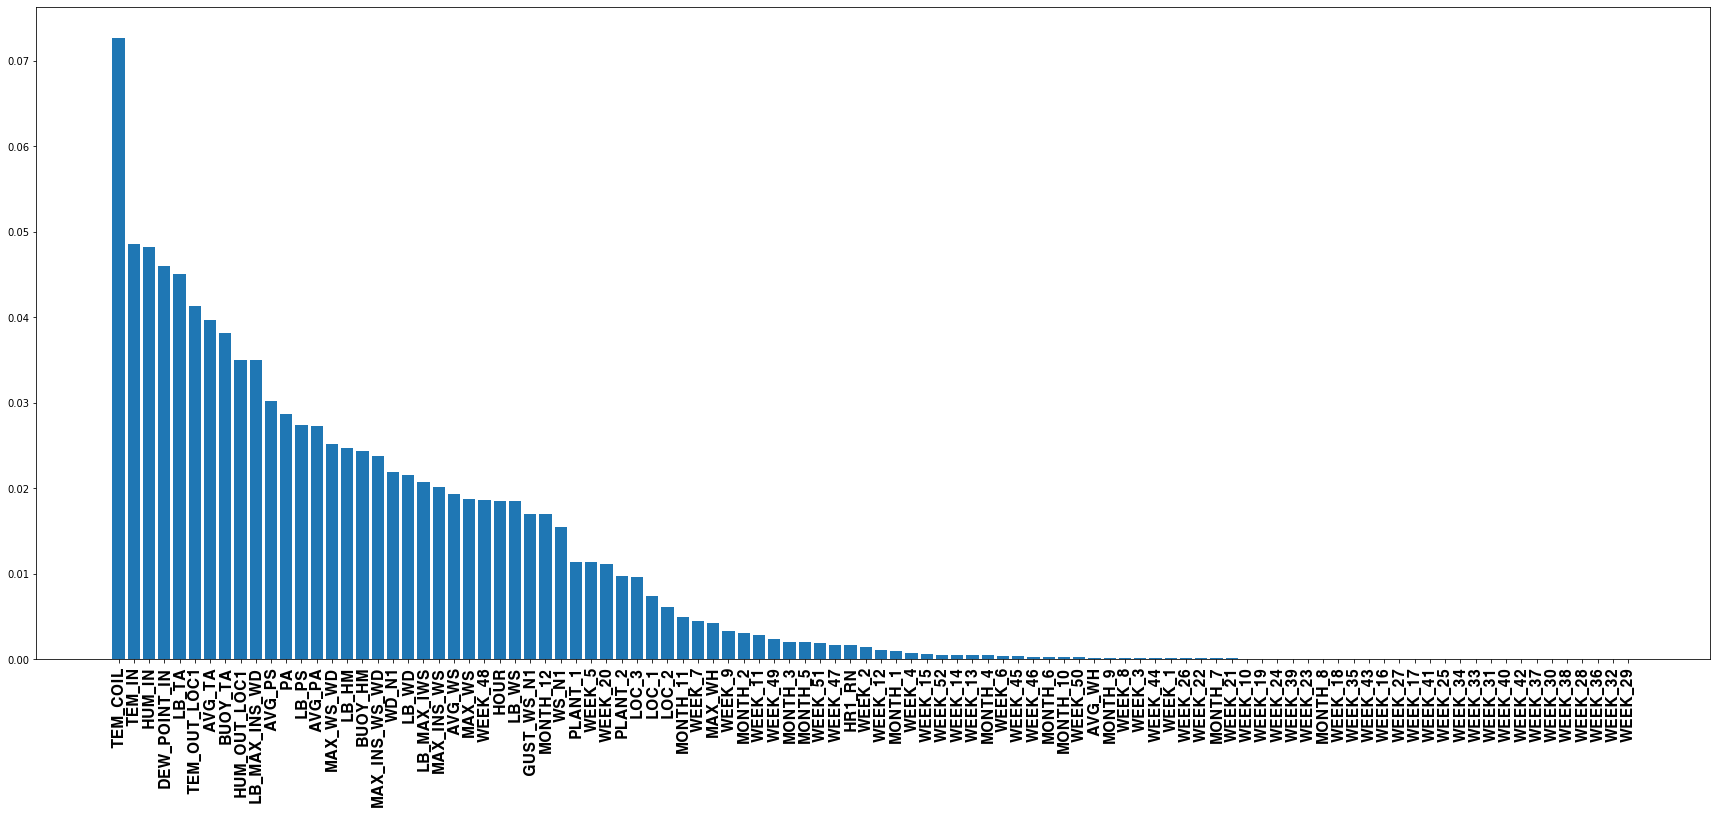

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf24_df.variable, imp_rf24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 48시간 결로 예측

In [184]:
from sklearn.ensemble import RandomForestClassifier
rf_model48 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model48.fit(X_train, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [185]:
y_pred48 = rf_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.93      0.78      0.85       594

    accuracy                           1.00    104796
   macro avg       0.96      0.89      0.92    104796
weighted avg       1.00      1.00      1.00    104796



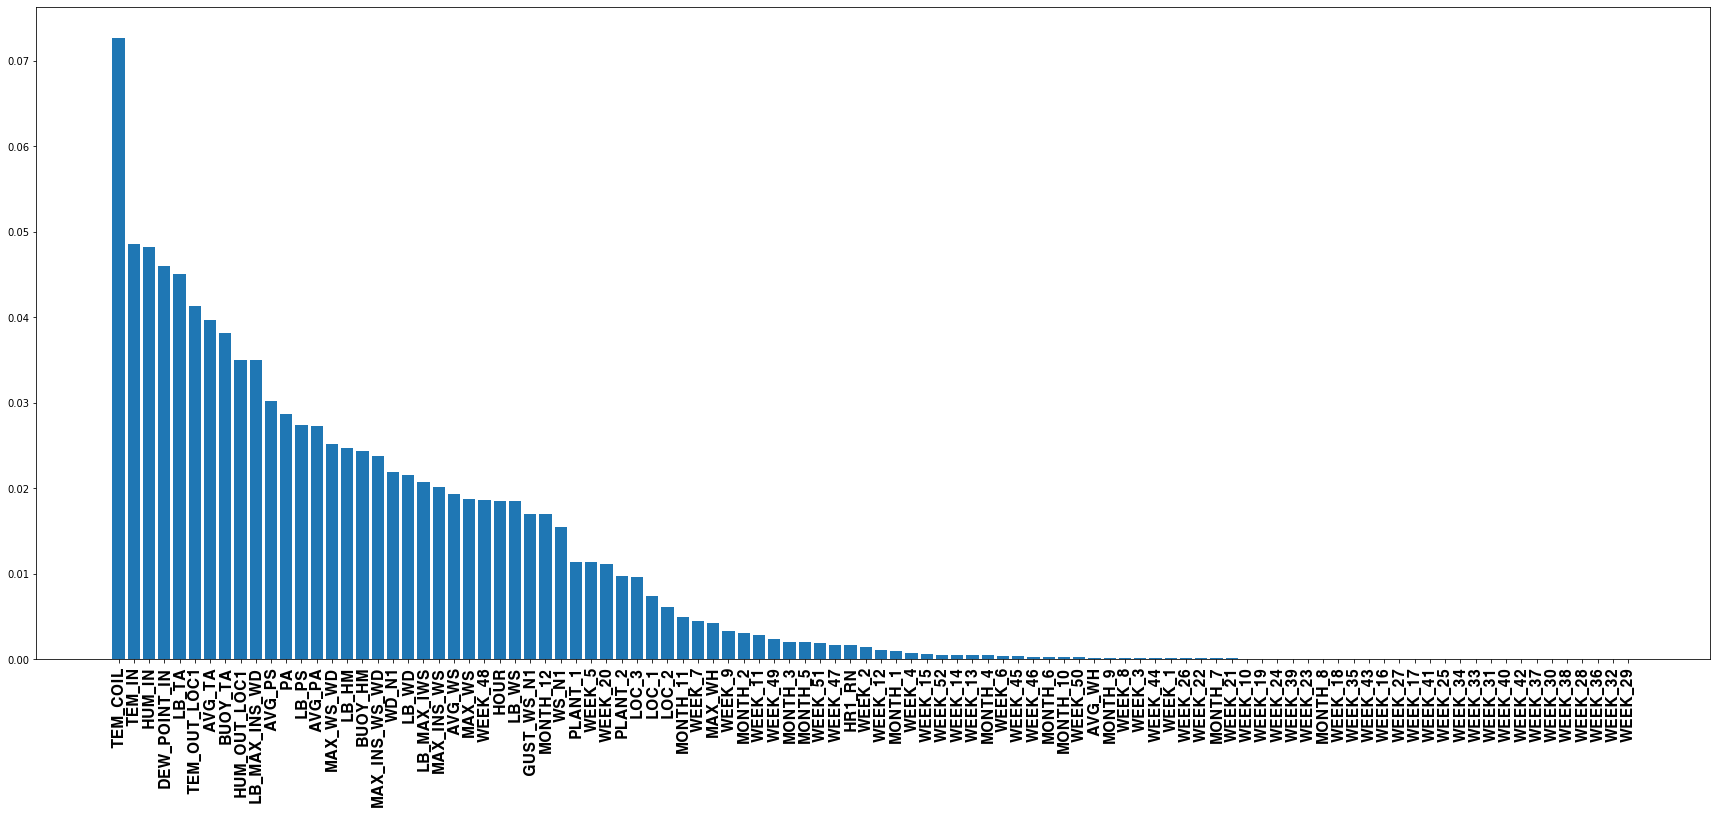

In [186]:
imp_rf48_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model48.feature_importances_], columns=['variable', 'importance'])
imp_rf48_df.sort_values(by='importance', ascending=False, inplace=True)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf48_df.variable, imp_rf48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 검증값 만들기

In [187]:
test

,X24H_COND_LOC,X48H_COND_LOC,HOUR,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52
0,NaN,NaN,0,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,-1.156985,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,4,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,-0.722579,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,10,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,-1.021676,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,11,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,-1.009317,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,13,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,-1.650210,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,NaN,NaN,3,-0.639614,-1.563968,-0.277684,-0.797087,-0.973308,-1.184008,0.636848,0.646940,-0.201451,-1.165727,-0.605992,-0.887058,0.974582,-0.892155,1.178701,-1.461947,0.720434,0.550731,0.630048,-1.830636,-0.796091,-0.446039,-0.16337,1.386802,-0.015526,1.263465,-0.014602,-0.844050,0.651951,-1.722919,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3535,NaN,NaN,5,-0.823010,-1.167179,-0.459468,-1.312941,0.436104,-1.120336,0.660368,0.670221,-0.201451,-1.303176,-0.917026,-1.027651,-0.307913,-1.214

In [188]:
validation = etl.makeValiation(test_data, rf_model24, rf_model48, test_X)
validation

C:\Users\B0110\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0110\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0110\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,2,2019-04-03 00:00:00,0,2
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,2,2019-04-03 04:30:00,0,2
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,3,2019-04-03 10:30:00,0,3
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,4,2019-04-03 11:00:00,0,4
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,5,2019-04-03 13:30:00,0,5
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,1,2020-03-31 07:00:00,0,1
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [189]:
etl.findCondRow(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


In [190]:
etl.findCondRow(validation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


In [191]:
etl.findCondRow(validation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


## 파일 저장하기

In [192]:
etl.save_validation_csv(validation,"rforest")

# LightGBM
## 24시간 결로 예측

In [37]:
from lightgbm import LGBMClassifier
lgbm_model24 = LGBMClassifier(n_estimators=100, random_state=42, boost_from_average=False)
lgbm_model24.fit(X_train, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [38]:
y_pred24 = lgbm_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.70      0.60      0.65       594

    accuracy                           1.00    104796
   macro avg       0.85      0.80      0.82    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [39]:
from lightgbm import LGBMClassifier
lgbm_model48 = LGBMClassifier(n_estimators=100, random_state=42, boost_from_average=False)
lgbm_model48.fit(X_train, y_train48)

LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [40]:
y_pred48 = lgbm_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.70      0.60      0.65       594

    accuracy                           1.00    104796
   macro avg       0.85      0.80      0.82    104796
weighted avg       1.00      1.00      1.00    104796



## 검증값 만들기

In [41]:
lgValiation =etl.makeValiation(test_data,lgbm_model24,lgbm_model48, test_X)
lgValiation

C:\Users\B0110\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0110\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0110\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [42]:
etl.findCondRow(lgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
8,2019-04-02 06:00:00,1,2,2019-04-03 06:00:00,1,99,2019-04-04 06:00:00,1,99
9,2019-04-02 07:00:00,1,1,2019-04-03 07:00:00,1,99,2019-04-04 07:00:00,1,99
10,2019-04-02 09:30:00,1,1,2019-04-03 09:30:00,1,99,2019-04-04 09:30:00,1,99
16,2019-04-02 19:30:00,1,1,2019-04-03 19:30:00,1,99,2019-04-04 19:30:00,1,99
20,2019-04-03 04:30:00,1,1,2019-04-04 04:30:00,1,99,2019-04-05 04:30:00,1,99
45,2019-04-05 06:30:00,2,2,2019-04-06 06:30:00,1,99,2019-04-07 06:30:00,1,99
46,2019-04-05 08:00:00,1,3,2019-04-06 08:00:00,1,99,2019-04-07 08:00:00,1,99
48,2019-04-05 15:30:00,1,3,2019-04-06 15:30:00,1,99,2019-04-07 15:30:00,1,99
581,2019-06-03 07:00:00,2,1,2019-06-04 07:00:00,1,99,2019-06-05 07:00:00,1,99
2427,2019-12-21 15:30:00,2,2,2019-12-22 15:30:00,1,99,2019-12-23 15:30:00,1,99


In [43]:
etl.findCondRow(lgValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
8,2019-04-02 06:00:00,1,2,2019-04-03 06:00:00,1,99,2019-04-04 06:00:00,1,99
9,2019-04-02 07:00:00,1,1,2019-04-03 07:00:00,1,99,2019-04-04 07:00:00,1,99
10,2019-04-02 09:30:00,1,1,2019-04-03 09:30:00,1,99,2019-04-04 09:30:00,1,99
16,2019-04-02 19:30:00,1,1,2019-04-03 19:30:00,1,99,2019-04-04 19:30:00,1,99
20,2019-04-03 04:30:00,1,1,2019-04-04 04:30:00,1,99,2019-04-05 04:30:00,1,99
45,2019-04-05 06:30:00,2,2,2019-04-06 06:30:00,1,99,2019-04-07 06:30:00,1,99
46,2019-04-05 08:00:00,1,3,2019-04-06 08:00:00,1,99,2019-04-07 08:00:00,1,99
48,2019-04-05 15:30:00,1,3,2019-04-06 15:30:00,1,99,2019-04-07 15:30:00,1,99
581,2019-06-03 07:00:00,2,1,2019-06-04 07:00:00,1,99,2019-06-05 07:00:00,1,99
2427,2019-12-21 15:30:00,2,2,2019-12-22 15:30:00,1,99,2019-12-23 15:30:00,1,99


In [44]:
etl.findCondRow(lgValiation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
8,2019-04-02 06:00:00,1,2,2019-04-03 06:00:00,1,99,2019-04-04 06:00:00,1,99
9,2019-04-02 07:00:00,1,1,2019-04-03 07:00:00,1,99,2019-04-04 07:00:00,1,99
10,2019-04-02 09:30:00,1,1,2019-04-03 09:30:00,1,99,2019-04-04 09:30:00,1,99
16,2019-04-02 19:30:00,1,1,2019-04-03 19:30:00,1,99,2019-04-04 19:30:00,1,99
20,2019-04-03 04:30:00,1,1,2019-04-04 04:30:00,1,99,2019-04-05 04:30:00,1,99
45,2019-04-05 06:30:00,2,2,2019-04-06 06:30:00,1,99,2019-04-07 06:30:00,1,99
46,2019-04-05 08:00:00,1,3,2019-04-06 08:00:00,1,99,2019-04-07 08:00:00,1,99
48,2019-04-05 15:30:00,1,3,2019-04-06 15:30:00,1,99,2019-04-07 15:30:00,1,99
581,2019-06-03 07:00:00,2,1,2019-06-04 07:00:00,1,99,2019-06-05 07:00:00,1,99
2427,2019-12-21 15:30:00,2,2,2019-12-22 15:30:00,1,99,2019-12-23 15:30:00,1,99


## 파일 저장하기

In [201]:
etl.save_validation_csv(lgValiation,"lgbm")

# XGBOOST
## 24시간 결로 예측

In [134]:
from xgboost import XGBClassifier
xgb_model24 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=10, random_state=42)
xgb_model24.fit(X_train, y_train24)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [135]:
y_pred24 = xgb_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.89      0.53      0.66       594

    accuracy                           1.00    104796
   macro avg       0.95      0.76      0.83    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [136]:
from xgboost import XGBClassifier
xgb_model48 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=10, random_state=42)
xgb_model48.fit(X_train, y_train48)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [137]:
y_pred48 = xgb_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.89      0.53      0.66       594

    accuracy                           1.00    104796
   macro avg       0.95      0.76      0.83    104796
weighted avg       1.00      1.00      1.00    104796



## 검증 값 만들기

In [138]:
xgValiation=etl.makeValiation(test_data,xgb_model24,xgb_model48,test_X)
xgValiation

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,45,2019-04-03 00:00:00,0,45
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,45,2019-04-03 04:30:00,0,45
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,45,2019-04-03 10:30:00,0,45
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,45,2019-04-03 11:00:00,0,45
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,45,2019-04-03 13:30:00,0,45
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,45,2020-03-31 03:00:00,0,45
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,45,2020-03-31 05:00:00,0,45
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,45,2020-03-31 07:00:00,0,45
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,45,2020-03-31 11:30:00,0,45


In [139]:
etl.findCondRow(xgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
418,2019-05-15 10:00:00,2,2,2019-05-16 10:00:00,1,50,2019-05-17 10:00:00,1,50
419,2019-05-15 10:00:00,2,1,2019-05-16 10:00:00,1,50,2019-05-17 10:00:00,1,50
3014,2020-02-11 15:00:00,2,1,2020-02-12 15:00:00,1,53,2020-02-13 15:00:00,1,53
3015,2020-02-11 15:00:00,1,2,2020-02-12 15:00:00,1,53,2020-02-13 15:00:00,1,53
3016,2020-02-11 15:00:00,2,2,2020-02-12 15:00:00,1,53,2020-02-13 15:00:00,1,53
3017,2020-02-11 16:00:00,1,1,2020-02-12 16:00:00,1,53,2020-02-13 16:00:00,1,53
3018,2020-02-11 16:00:00,2,1,2020-02-12 16:00:00,1,53,2020-02-13 16:00:00,1,53
3019,2020-02-11 16:00:00,2,2,2020-02-12 16:00:00,1,53,2020-02-13 16:00:00,1,53
3020,2020-02-11 16:30:00,1,1,2020-02-12 16:30:00,1,53,2020-02-13 16:30:00,1,53
3021,2020-02-11 16:30:00,2,1,2020-02-12 16:30:00,1,53,2020-02-13 16:30:00,1,53


In [140]:
etl.findCondRow(xgValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
418,2019-05-15 10:00:00,2,2,2019-05-16 10:00:00,1,50,2019-05-17 10:00:00,1,50
419,2019-05-15 10:00:00,2,1,2019-05-16 10:00:00,1,50,2019-05-17 10:00:00,1,50
3014,2020-02-11 15:00:00,2,1,2020-02-12 15:00:00,1,53,2020-02-13 15:00:00,1,53
3015,2020-02-11 15:00:00,1,2,2020-02-12 15:00:00,1,53,2020-02-13 15:00:00,1,53
3016,2020-02-11 15:00:00,2,2,2020-02-12 15:00:00,1,53,2020-02-13 15:00:00,1,53
3017,2020-02-11 16:00:00,1,1,2020-02-12 16:00:00,1,53,2020-02-13 16:00:00,1,53
3018,2020-02-11 16:00:00,2,1,2020-02-12 16:00:00,1,53,2020-02-13 16:00:00,1,53
3019,2020-02-11 16:00:00,2,2,2020-02-12 16:00:00,1,53,2020-02-13 16:00:00,1,53
3020,2020-02-11 16:30:00,1,1,2020-02-12 16:30:00,1,53,2020-02-13 16:30:00,1,53
3021,2020-02-11 16:30:00,2,1,2020-02-12 16:30:00,1,53,2020-02-13 16:30:00,1,53


In [141]:
etl.findCondRow(xgValiation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
418,2019-05-15 10:00:00,2,2,2019-05-16 10:00:00,1,50,2019-05-17 10:00:00,1,50
419,2019-05-15 10:00:00,2,1,2019-05-16 10:00:00,1,50,2019-05-17 10:00:00,1,50
3014,2020-02-11 15:00:00,2,1,2020-02-12 15:00:00,1,53,2020-02-13 15:00:00,1,53
3015,2020-02-11 15:00:00,1,2,2020-02-12 15:00:00,1,53,2020-02-13 15:00:00,1,53
3016,2020-02-11 15:00:00,2,2,2020-02-12 15:00:00,1,53,2020-02-13 15:00:00,1,53
3017,2020-02-11 16:00:00,1,1,2020-02-12 16:00:00,1,53,2020-02-13 16:00:00,1,53
3018,2020-02-11 16:00:00,2,1,2020-02-12 16:00:00,1,53,2020-02-13 16:00:00,1,53
3019,2020-02-11 16:00:00,2,2,2020-02-12 16:00:00,1,53,2020-02-13 16:00:00,1,53
3020,2020-02-11 16:30:00,1,1,2020-02-12 16:30:00,1,53,2020-02-13 16:30:00,1,53
3021,2020-02-11 16:30:00,2,1,2020-02-12 16:30:00,1,53,2020-02-13 16:30:00,1,53


## 파일 저장하기

In [142]:
etl.save_validation_csv(xgValiation,"xgboost")

# KNN
## 24시간 결로 예측

In [143]:
from sklearn.neighbors import KNeighborsClassifier
neigh24 = KNeighborsClassifier(n_neighbors=3)
neigh24.fit(X_train, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [144]:
y_pred24 = neigh24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.87      0.79      0.83       594

    accuracy                           1.00    104796
   macro avg       0.93      0.89      0.91    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [145]:
from sklearn.neighbors import KNeighborsClassifier
neigh48 = KNeighborsClassifier(n_neighbors=3)
neigh48.fit(X_train, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [146]:
y_pred48 = neigh48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.87      0.79      0.83       594

    accuracy                           1.00    104796
   macro avg       0.93      0.89      0.91    104796
weighted avg       1.00      1.00      1.00    104796



## 검증값 만들기

In [147]:
knnValiation=etl.makeValiation(test_data,neigh24,neigh48,test_X)
knnValiation

C:\Users\B0110\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0110\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0110\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [148]:
etl.findCondRow(knnValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
443,2019-05-17 12:00:00,2,1,2019-05-18 12:00:00,1,66,2019-05-19 12:00:00,1,66
457,2019-05-19 03:30:00,1,3,2019-05-20 03:30:00,1,66,2019-05-21 03:30:00,1,66
461,2019-05-19 15:00:00,1,2,2019-05-20 15:00:00,1,66,2019-05-21 15:00:00,1,66
462,2019-05-19 16:30:00,1,3,2019-05-20 16:30:00,1,66,2019-05-21 16:30:00,1,66
522,2019-05-27 04:00:00,1,2,2019-05-28 04:00:00,1,66,2019-05-29 04:00:00,1,66
...,...,...,...,...,...,...,...,...,...
3049,2020-02-11 23:30:00,1,3,2020-02-12 23:30:00,1,100,2020-02-13 23:30:00,1,100
3050,2020-02-12 00:00:00,2,1,2020-02-13 00:00:00,1,100,2020-02-14 00:00:00,1,100
3051,2020-02-12 00:00:00,1,2,2020-02-13 00:00:00,1,100,2020-02-14 00:00:00,1,100
3052,2020-02-12 00:00:00,2,2,2020-02-13 00:00:00,1,66,2020-02-14 00:00:00,1,66


In [149]:
etl.findCondRow(knnValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
443,2019-05-17 12:00:00,2,1,2019-05-18 12:00:00,1,66,2019-05-19 12:00:00,1,66
457,2019-05-19 03:30:00,1,3,2019-05-20 03:30:00,1,66,2019-05-21 03:30:00,1,66
461,2019-05-19 15:00:00,1,2,2019-05-20 15:00:00,1,66,2019-05-21 15:00:00,1,66
462,2019-05-19 16:30:00,1,3,2019-05-20 16:30:00,1,66,2019-05-21 16:30:00,1,66
522,2019-05-27 04:00:00,1,2,2019-05-28 04:00:00,1,66,2019-05-29 04:00:00,1,66
...,...,...,...,...,...,...,...,...,...
3049,2020-02-11 23:30:00,1,3,2020-02-12 23:30:00,1,100,2020-02-13 23:30:00,1,100
3050,2020-02-12 00:00:00,2,1,2020-02-13 00:00:00,1,100,2020-02-14 00:00:00,1,100
3051,2020-02-12 00:00:00,1,2,2020-02-13 00:00:00,1,100,2020-02-14 00:00:00,1,100
3052,2020-02-12 00:00:00,2,2,2020-02-13 00:00:00,1,66,2020-02-14 00:00:00,1,66


In [150]:
etl.findCondRow(knnValiation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
443,2019-05-17 12:00:00,2,1,2019-05-18 12:00:00,1,66,2019-05-19 12:00:00,1,66
457,2019-05-19 03:30:00,1,3,2019-05-20 03:30:00,1,66,2019-05-21 03:30:00,1,66
461,2019-05-19 15:00:00,1,2,2019-05-20 15:00:00,1,66,2019-05-21 15:00:00,1,66
462,2019-05-19 16:30:00,1,3,2019-05-20 16:30:00,1,66,2019-05-21 16:30:00,1,66
522,2019-05-27 04:00:00,1,2,2019-05-28 04:00:00,1,66,2019-05-29 04:00:00,1,66
...,...,...,...,...,...,...,...,...,...
3049,2020-02-11 23:30:00,1,3,2020-02-12 23:30:00,1,100,2020-02-13 23:30:00,1,100
3050,2020-02-12 00:00:00,2,1,2020-02-13 00:00:00,1,100,2020-02-14 00:00:00,1,100
3051,2020-02-12 00:00:00,1,2,2020-02-13 00:00:00,1,100,2020-02-14 00:00:00,1,100
3052,2020-02-12 00:00:00,2,2,2020-02-13 00:00:00,1,66,2020-02-14 00:00:00,1,66


## 파일 저장하기

In [151]:
etl.save_validation_csv(xgValiation,"knn")

# Logistic Regression

## 24시간 결로 예측

In [244]:
from sklearn.linear_model import LogisticRegression
lr_model24 = LogisticRegression(random_state = 42).fit(X_train, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [245]:
y_pred24 = lr_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.86      0.26      0.40       594

    accuracy                           1.00    104796
   macro avg       0.93      0.63      0.70    104796
weighted avg       1.00      1.00      0.99    104796



## 48시간 결로 예측

In [246]:
from sklearn.linear_model import LogisticRegression
lr_model48 = LogisticRegression(random_state = 42).fit(X_train, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [247]:
y_pred48 = lr_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.86      0.26      0.40       594

    accuracy                           1.00    104796
   macro avg       0.93      0.63      0.70    104796
weighted avg       1.00      1.00      0.99    104796



# MLPClassifier

## 24시간 결로 예측

In [234]:
from sklearn.neural_network import MLPClassifier
mlp_model24 = MLPClassifier(random_state=42)
mlp_model24.fit(X_train, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [235]:
y_pred24 = mlp_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.92      0.71      0.80       594

    accuracy                           1.00    104796
   macro avg       0.96      0.85      0.90    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [236]:
from sklearn.neural_network import MLPClassifier
mlp_model48 = MLPClassifier(random_state=42)
mlp_model48.fit(X_train, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [237]:
y_pred48 = mlp_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.88      0.87      0.88       594

    accuracy                           1.00    104796
   macro avg       0.94      0.93      0.94    104796
weighted avg       1.00      1.00      1.00    104796



## 검증값 만들기

In [238]:
mlpValiation=etl.makeValiation(test_data,mlp_model24,mlp_model48,test_X)
mlpValiation

C:\Users\B0110\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\B0110\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\B0110\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [239]:
etl.findCondRow(mlpValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2366,2019-12-16 12:00:00,1,1,2019-12-17 12:00:00,1,50,2019-12-18 12:00:00,1,61
2367,2019-12-16 12:00:00,2,1,2019-12-17 12:00:00,1,62,2019-12-18 12:00:00,1,85
2368,2019-12-16 12:00:00,1,2,2019-12-17 12:00:00,1,76,2019-12-18 12:00:00,1,69
2371,2019-12-16 12:30:00,1,1,2019-12-17 12:30:00,1,56,2019-12-18 12:30:00,1,85
2372,2019-12-16 12:30:00,2,1,2019-12-17 12:30:00,1,80,2019-12-18 12:30:00,1,95
2373,2019-12-16 12:30:00,2,2,2019-12-17 12:30:00,1,54,2019-12-18 12:30:00,1,66
2374,2019-12-16 12:30:00,1,3,2019-12-17 12:30:00,1,76,2019-12-18 12:30:00,1,91
2376,2019-12-16 13:00:00,1,2,2019-12-17 13:00:00,1,80,2019-12-18 13:00:00,1,97
2378,2019-12-16 13:00:00,1,3,2019-12-17 13:00:00,1,69,2019-12-18 13:00:00,1,91
2379,2019-12-16 13:30:00,1,2,2019-12-17 13:30:00,1,93,2019-12-18 13:30:00,1,98


In [240]:
etl.findCondRow(mlpValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
24,2019-04-03 10:00:00,2,1,2019-04-04 10:00:00,0,11,2019-04-05 10:00:00,1,53
457,2019-05-19 03:30:00,1,3,2019-05-20 03:30:00,0,15,2019-05-21 03:30:00,1,50
2087,2019-11-23 16:00:00,1,2,2019-11-24 16:00:00,0,28,2019-11-25 16:00:00,1,63
2359,2019-12-16 11:00:00,2,1,2019-12-17 11:00:00,0,24,2019-12-18 11:00:00,1,62
2366,2019-12-16 12:00:00,1,1,2019-12-17 12:00:00,1,50,2019-12-18 12:00:00,1,61
2367,2019-12-16 12:00:00,2,1,2019-12-17 12:00:00,1,62,2019-12-18 12:00:00,1,85
2368,2019-12-16 12:00:00,1,2,2019-12-17 12:00:00,1,76,2019-12-18 12:00:00,1,69
2371,2019-12-16 12:30:00,1,1,2019-12-17 12:30:00,1,56,2019-12-18 12:30:00,1,85
2372,2019-12-16 12:30:00,2,1,2019-12-17 12:30:00,1,80,2019-12-18 12:30:00,1,95
2373,2019-12-16 12:30:00,2,2,2019-12-17 12:30:00,1,54,2019-12-18 12:30:00,1,66


In [243]:
etl.save_validation_csv(mlpValiation,"mlp")

# SVM

## 24시간 결로 예측

In [248]:
from sklearn.svm import SVC
svm_model24 = SVC(kernel='poly', random_state=42,
             gamma=10, C=1.0).fit(X_train, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [249]:
y_pred24 = svm_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.71      0.84      0.77       594

    accuracy                           1.00    104796
   macro avg       0.85      0.92      0.88    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [250]:
from sklearn.svm import SVC
svm_model48 = SVC(kernel='poly', random_state=42,
             gamma=10, C=1.0).fit(X_train, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [251]:
y_pred48 = svm_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104202
         1.0       0.71      0.84      0.77       594

    accuracy                           1.00    104796
   macro avg       0.85      0.92      0.88    104796
weighted avg       1.00      1.00      1.00    104796



# 나이브베이즈

## 24시간 결로 예측

In [220]:
from sklearn.naive_bayes import GaussianNB
nb_model24 = GaussianNB().fit(X_train, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [221]:
from sklearn.naive_bayes import BernoulliNB
bn_model24 = BernoulliNB().fit(X_train, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [222]:
y_pred24 = nb_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.80    104202
         1.0       0.02      0.97      0.03       594

    accuracy                           0.67    104796
   macro avg       0.51      0.82      0.42    104796
weighted avg       0.99      0.67      0.79    104796



In [223]:
y_pred24 = bn_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    104202
         1.0       0.05      0.63      0.10       594

    accuracy                           0.93    104796
   macro avg       0.53      0.78      0.53    104796
weighted avg       0.99      0.93      0.96    104796



## 48시간 결로 예측

In [224]:
from sklearn.naive_bayes import GaussianNB
nb_model48 = GaussianNB().fit(X_train, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [225]:
from sklearn.naive_bayes import BernoulliNB
bn_model48 = BernoulliNB().fit(X_train, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [226]:
y_pred48 = nb_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.80    104202
         1.0       0.02      0.97      0.03       594

    accuracy                           0.67    104796
   macro avg       0.51      0.82      0.42    104796
weighted avg       0.99      0.67      0.79    104796



In [227]:
y_pred48 = bn_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    104202
         1.0       0.05      0.63      0.10       594

    accuracy                           0.93    104796
   macro avg       0.53      0.78      0.53    104796
weighted avg       0.99      0.93      0.96    104796



# Voting Classifier

## 24시간 결로 예측

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_model24 = VotingClassifier(
    estimators=[('lgbm', lgbm_model24), ('neigh', neigh24)], voting='hard')
voting_model24.fit(X_train24, y_train24)

## 48시간 결로 예측